In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import seaborn as sns
import networkx as nx

from sklearn.neighbors import KernelDensity

from graspy.plot import heatmap

from mgcpy.independence_tests.mgc.mgc import MGC

from load_data import pairs_from_list

from utils import estimate_block_assignment, to_distance_mtx, identity, sort_graph, binarize, pvalue, block_permute, \
get_null_test_stats, to_undirected

In [2]:
dwi_dirname = '../../data/mri/dwi/'
dwi_file_format = 'sub-{}_ses-{}_dwi_desikan.ssv'
fmri_dirname = '../../data/mri/fmri/'
fmri_file_format = 'sub-{}_ses-{}_bold_desikan_res-2x2x2_measure-correlation.gpickle'


def read_dwi(subject_id, session_num):
    file_name = dwi_dirname+dwi_file_format.format(subject_id, session_num)
    nx_out = nx.read_weighted_edgelist(file_name)
    return nx.to_numpy_array(nx_out)


def read_fmri(subject_id, session_num):
    file_name = fmri_dirname+fmri_file_format.format(subject_id, session_num)
    nx_out = nx.read_gpickle(file_name)
    return nx.to_numpy_array(nx_out)

In [5]:
with open('../../results/mri_pvalues_case_1.pkl', 'rb') as f:
    pval1 = pickle.load(f)
    pval1 = np.array(pval1)[:, np.newaxis]
with open('../../results/mri_pvalues_case_2.pkl', 'rb') as f:
    pval2 = pickle.load(f)
    pval2 = np.array(pval2)[:, np.newaxis]
with open('../../results/mri_pvalues_case_1_setk_1.pkl', 'rb') as f:
    pval3 = pickle.load(f)
    pval3 = np.array(pval3)[:, np.newaxis]

In [24]:
plt.figure(figsize=(8, 6))

mpl.style.use('seaborn')
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
legend_size = 16
label_size = 18

<Figure size 576x432 with 0 Axes>

[]

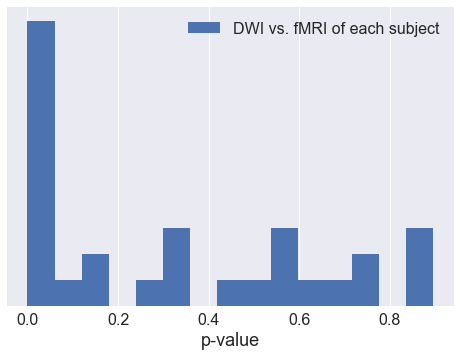

In [25]:
plt.hist(pval1, bins=15, label='DWI vs. fMRI of each subject')
plt.legend(prop={'size': legend_size})
plt.xlabel('p-value', fontsize=label_size)
plt.yticks([])
plt.plot()

[]

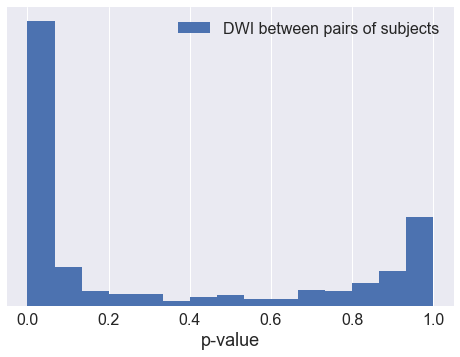

In [27]:
plt.hist(pval2, bins=15, label='DWI between pairs of subjects')
plt.legend(prop={'size': legend_size})
plt.xlabel('p-value', fontsize=label_size)
plt.yticks([])
plt.plot()

[]

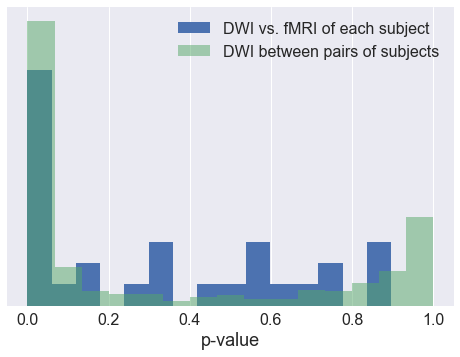

In [31]:
plt.hist(pval1, bins=15, density=True, label='DWI vs. fMRI of each subject')
plt.hist(pval2, bins=15, density=True, 
         label='DWI between pairs of subjects', alpha=0.5)

plt.legend(prop={'size': legend_size})
plt.xlabel('p-value', fontsize=label_size)
plt.yticks([])
plt.plot()

### Analysis

In [6]:
subject_list = ['00254{}'.format(i) for i in np.arange(27, 57)]
session_list = [i for i in range(1, 11)]

pairs = np.array(pairs_from_list(subject_list))
pairs_small_p = pairs[np.where(pval2 < 0.05)[0]]

In [50]:
k_arr = np.logspace(start=1, stop=6, num=6, base=2, dtype=int)
reps = 100

def plot_ts_null(test_stats_null_arr, g1, g2):
    mgc = MGC(compute_distance_matrix=identity)
    test_stats_alt, _ = mgc.test_statistic(to_distance_mtx(g1), to_distance_mtx(g2))
    plt.figure(figsize=(8, 6))
    for i in range(test_stats_null_arr.shape[1]):
        plt.plot(k_arr, test_stats_null_arr[:, i], color='g', marker='o', linestyle='--', alpha=0.5)
    plt.hlines(y=test_stats_alt, xmin=min(k_arr), xmax=max(k_arr), label='observed test statistic')
    plt.vlines(x=np.unique(block_assignment).size, ymin=0, ymax=test_stats_alt, 
               label='the BIC estimated k', colors='m')
    plt.xlabel('number of blocks')
    plt.ylabel('mgc test statistic')
    plt.legend(loc=4)
    plt.plot()

In [44]:
subject1, subject2 = pairs_small_p[np.random.choice(np.arange(pairs_small_p.shape[0]), 1)][0]
print('{}, {}'.format(subject1, subject2))
g1 = read_dwi(subject1, session_num=1)
g2 = read_dwi(subject2, session_num=1)

0025430, 0025441


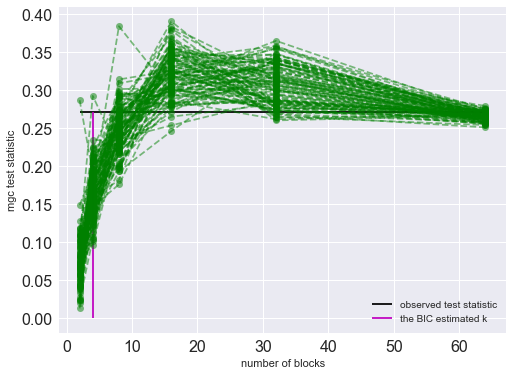

In [51]:
null_arr = get_null_test_stats(g1, g2, k_arr, reps)
plot_ts_null(null_arr, g1, g2)

In [52]:
subject1, subject2 = pairs_small_p[np.random.choice(np.arange(pairs_small_p.shape[0]), 1)][0]
print('{}, {}'.format(subject1, subject2))
g1 = read_dwi(subject1, session_num=1)
g2 = read_dwi(subject2, session_num=1)

0025437, 0025441


100%|██████████| 100/100 [00:53<00:00,  1.85it/s]


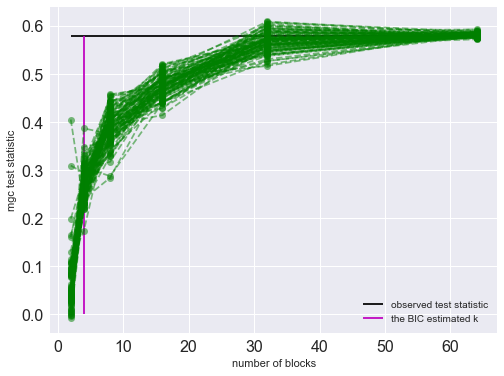

In [53]:
null_arr = get_null_test_stats(g1, g2, k_arr, reps)
plot_ts_null(null_arr, g1, g2)

In [55]:
subject1, subject2 = pairs_small_p[np.random.choice(np.arange(pairs_small_p.shape[0]), 1)][0]
print('{}, {}'.format(subject1, subject2))
g1 = read_dwi(subject1, session_num=1)
g2 = read_dwi(subject2, session_num=1)

0025436, 0025453


100%|██████████| 100/100 [00:53<00:00,  2.05it/s]


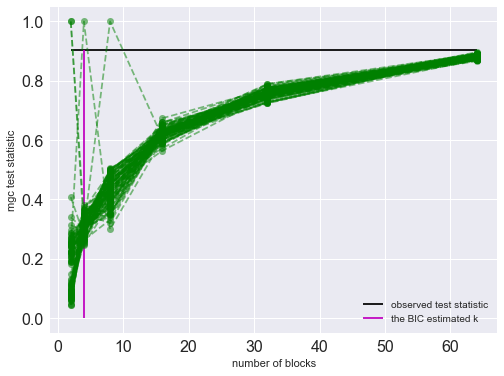

In [56]:
null_arr = get_null_test_stats(g1, g2, k_arr, reps)
plot_ts_null(null_arr, g1, g2)

In [3]:
subject1, subject2 = pairs_small_p[np.random.choice(np.arange(pairs_small_p.shape[0]), 1)][0]
print('{}, {}'.format(subject1, subject2))
g1 = read_dwi(subject1, session_num=1)
g2 = read_dwi(subject2, session_num=1)

NameError: name 'pairs_small_p' is not defined

100%|██████████| 100/100 [00:50<00:00,  2.12it/s]


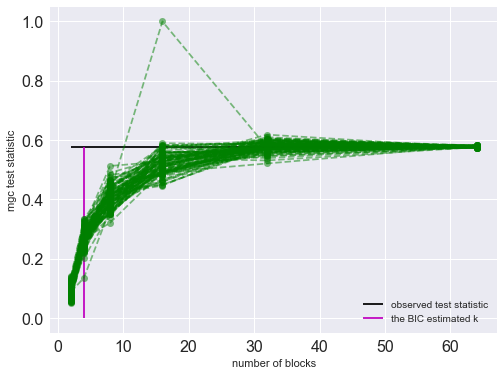

In [58]:
null_arr = get_null_test_stats(g1, g2, k_arr, reps)
plot_ts_null(null_arr, g1, g2)

In [18]:
g1_ud = to_undirected(g1)
g2_ud = to_undirected(g2)

In [19]:
block_assignment = estimate_block_assignment(g1_ud, g2_ud)

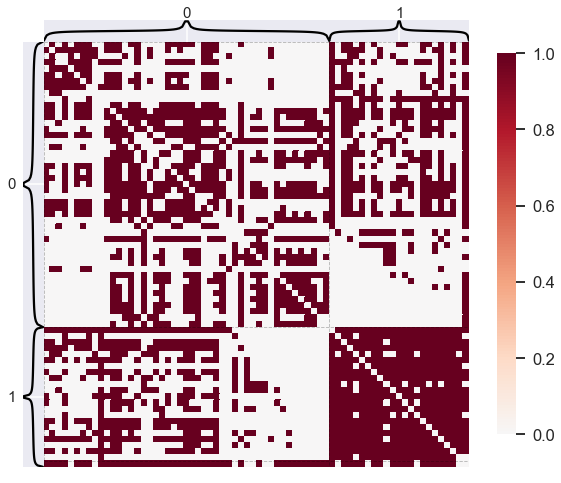

In [20]:
heatmap(g1_ud, inner_hier_labels=block_assignment)

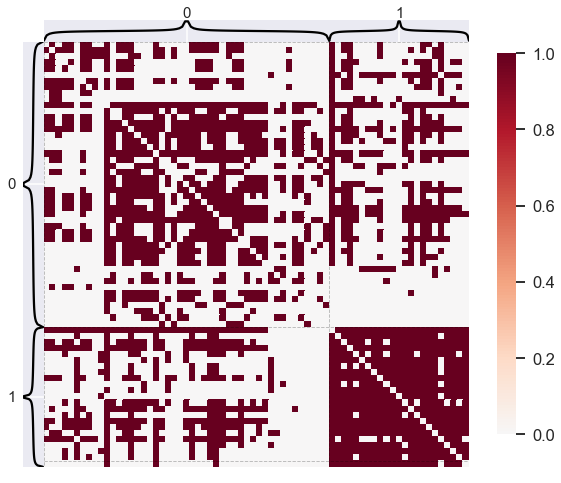

In [21]:
heatmap(g2_ud, inner_hier_labels=block_assignment)

In [28]:
mgc = MGC(compute_distance_matrix=identity)
ta, _ = mgc.test_statistic(to_distance_mtx(g1_ud), to_distance_mtx(g2_ud))
t0, _ = mgc.test_statistic(to_distance_mtx(block_permute(g1_ud, block_assignment)),
                   to_distance_mtx(sort_graph(g2_ud, block_assignment)))

print('test stats under Ha: {}'.format(ta))
print('test stats under H0: {}'.format(t0))

test stats under Ha: 0.2725788759757166
test stats under H0: 0.14001609252378666
